# Correlation of DESI Telemetry Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from platform import python_version
print(python_version())
import datetime
import pytz
import psycopg2


start=datetime.datetime(2019,10,22,0,0,0)
utc = pytz.timezone("UTC") #America/Phoenix")
start = utc.localize(start)

# sets maximation values of correlation estimation (i.e. range from -1 to 1)
vmin = -1
vmax = 1

3.9.7


In [16]:
with open('../data/unsampled/environmentmonitor_tower.pkl', 'rb') as pf:
    tower_data = pickle.load(pf).drop(columns=['time_recorded'])
with open('../data/unsampled/environmentmonitor_dome.pkl', 'rb') as pf:
    dome_data = pickle.load(pf).drop(columns=['time_recorded'])
with open('../data/unsampled/environmentmonitor_telescope.pkl', 'rb') as pf:
    telescope_data = pickle.load(pf).drop(columns=['time_recorded', 'mirror_status'])
with open('../data/unsampled/etc_seeing.pkl', 'rb') as pf:
    seeing_data = pickle.load(pf).drop(columns=['time_recorded'])
with open('../data/unsampled/etc_telemetry.pkl', 'rb') as pf:
    telemetry_data = pickle.load(pf).drop(columns=['time_recorded'])
with open('../data/unsampled/tcs_info.pkl', 'rb') as pf:
    tcs_data = pickle.load(pf).drop(columns=['time_recorded'])

## Intra-Table Correlation

### Tower Data Correlation

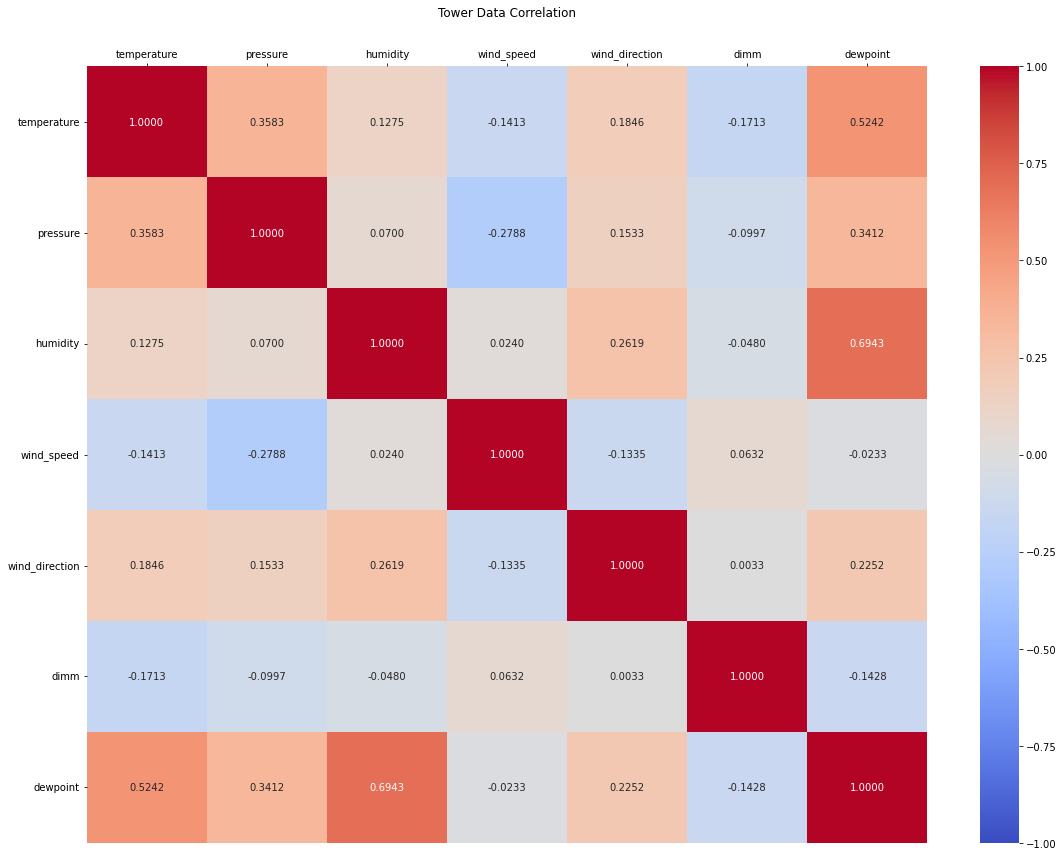

In [13]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(tower_data.corr(method='spearman'), annot=True, fmt='.4f',
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(tower_data.columns.values, rotation=0)
ax.set_xticklabels(tower_data.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Tower Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('tower_corr.png')
plt.show()

### Dome Data Correlation

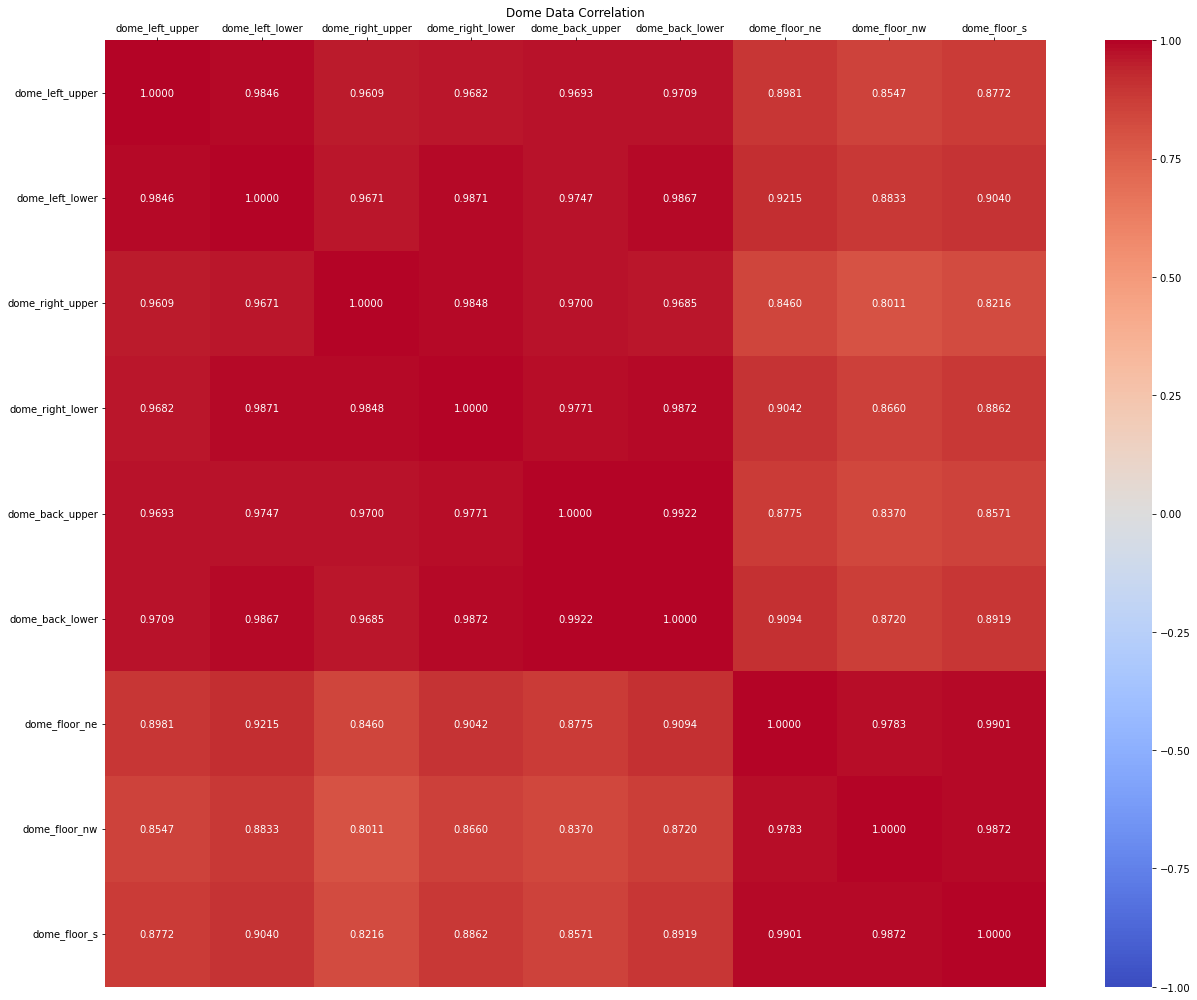

In [14]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(dome_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(dome_data.columns.values, rotation=0)
ax.set_xticklabels(dome_data.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Dome Data Correlation')
fig.tight_layout()
plt.savefig('dome_corr.png')
plt.show()

### Telescope Data Correlation

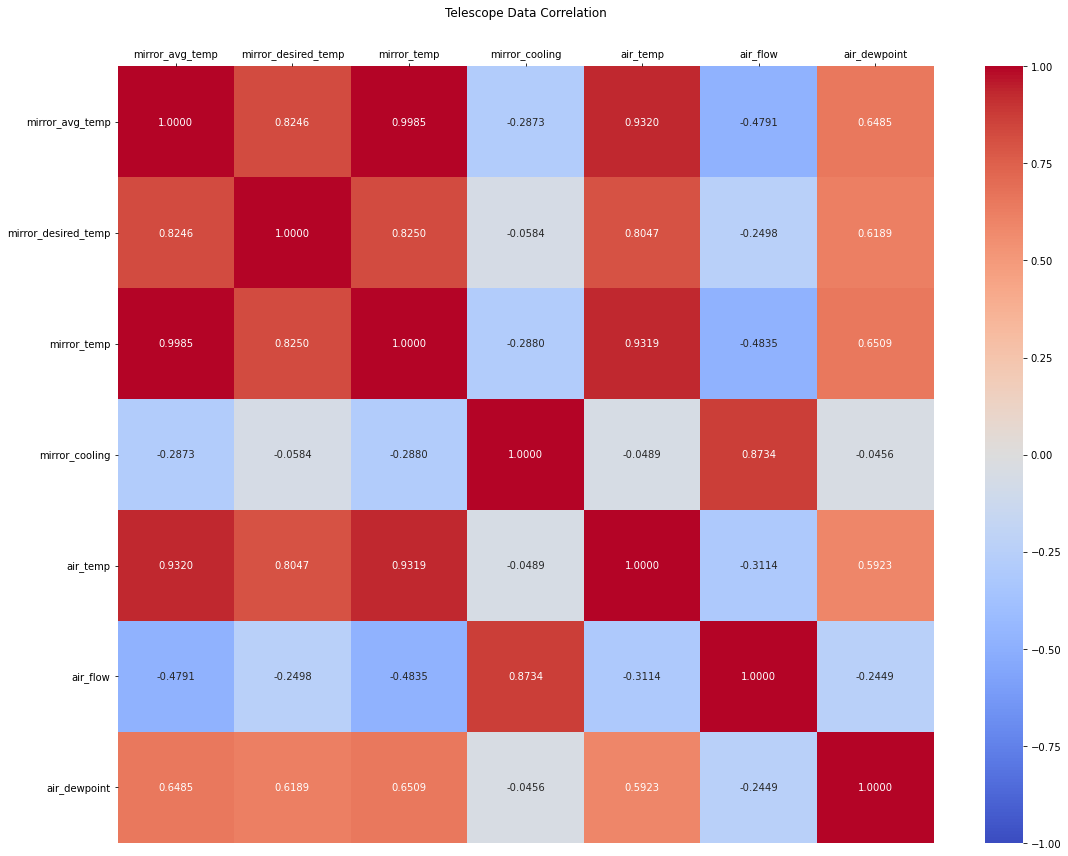

In [17]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(telescope_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(telescope_data.columns.values, rotation=0)
ax.set_xticklabels(telescope_data.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Telescope Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('telescope_corr.png')
plt.show()

# ETC Telemetry Correlation Matrix

NameError: name 'etc_telemetry_data' is not defined

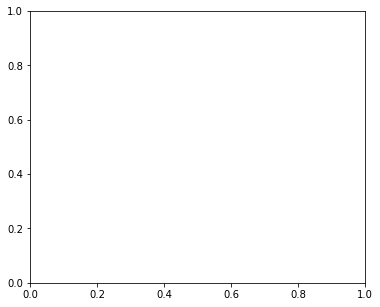

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(telemetry_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(telemetry_data.columns.values, rotation=0)
ax.set_xticklabels(telemetry_data.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('ETC Telemetry Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('etc_telemetry_corr.png')
plt.show()

# ETC Seeing Correlation Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(seeing_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(seeing_data.columns.values)
ax.set_xticklabels(seeing_data.columns.values)
ax.xaxis.tick_top()
ax.set_title('ETC Seeing Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('etc_seeing_corr.png')
plt.show()

### TCS Info Correlation Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(tcs_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(tcs_data.columns.values, rotation=0)
ax.set_xticklabels(tcs_data.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('TCS Info Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('tcs_info_corr.png')
plt.show()

## Inter-Table Data Correlation (Before Time Syncronization)

### Temperature Correlation (Before Time Syncronization)

In [ ]:
temperature_data = pd.DataFrame()
temperature_data['tower_temp'] = tower_data['temperature']
for i in dome_data.columns.values:
    temperature_data[i] = dome_data[i]
temperature_data['mirror_temp'] = telescope_data['mirror_temp']
temperature_data['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
temperature_data['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
temperature_data['air_temp'] = telescope_data['air_temp']
temperature_labels = temperature_data.columns.values

In [ ]:
fig, ax = plt.subplots(figsize=(25, 16))
sns.heatmap(temperature_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(temperature_labels, rotation=0)
ax.set_xticklabels(temperature_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Temperature Data Correlation (Before Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('temp_corr_before_sync.png')
plt.show()

### Mirror Temperature and Seeing Correlation (Before Time Syncronization)

In [16]:
mirror_and_seeing = pd.DataFrame()
mirror_and_seeing['tower_temp'] = tower_data['temperature']
mirror_and_seeing['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
mirror_and_seeing['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
mirror_and_seeing['air_temp'] = telescope_data['air_temp']
mirror_and_seeing['mirror_temp'] = telescope_data['mirror_temp']
mirror_and_seeing['seeing'] = etc_telemetry_data['seeing']
mirror_and_seeing_labels = mirror_and_seeing.columns.values

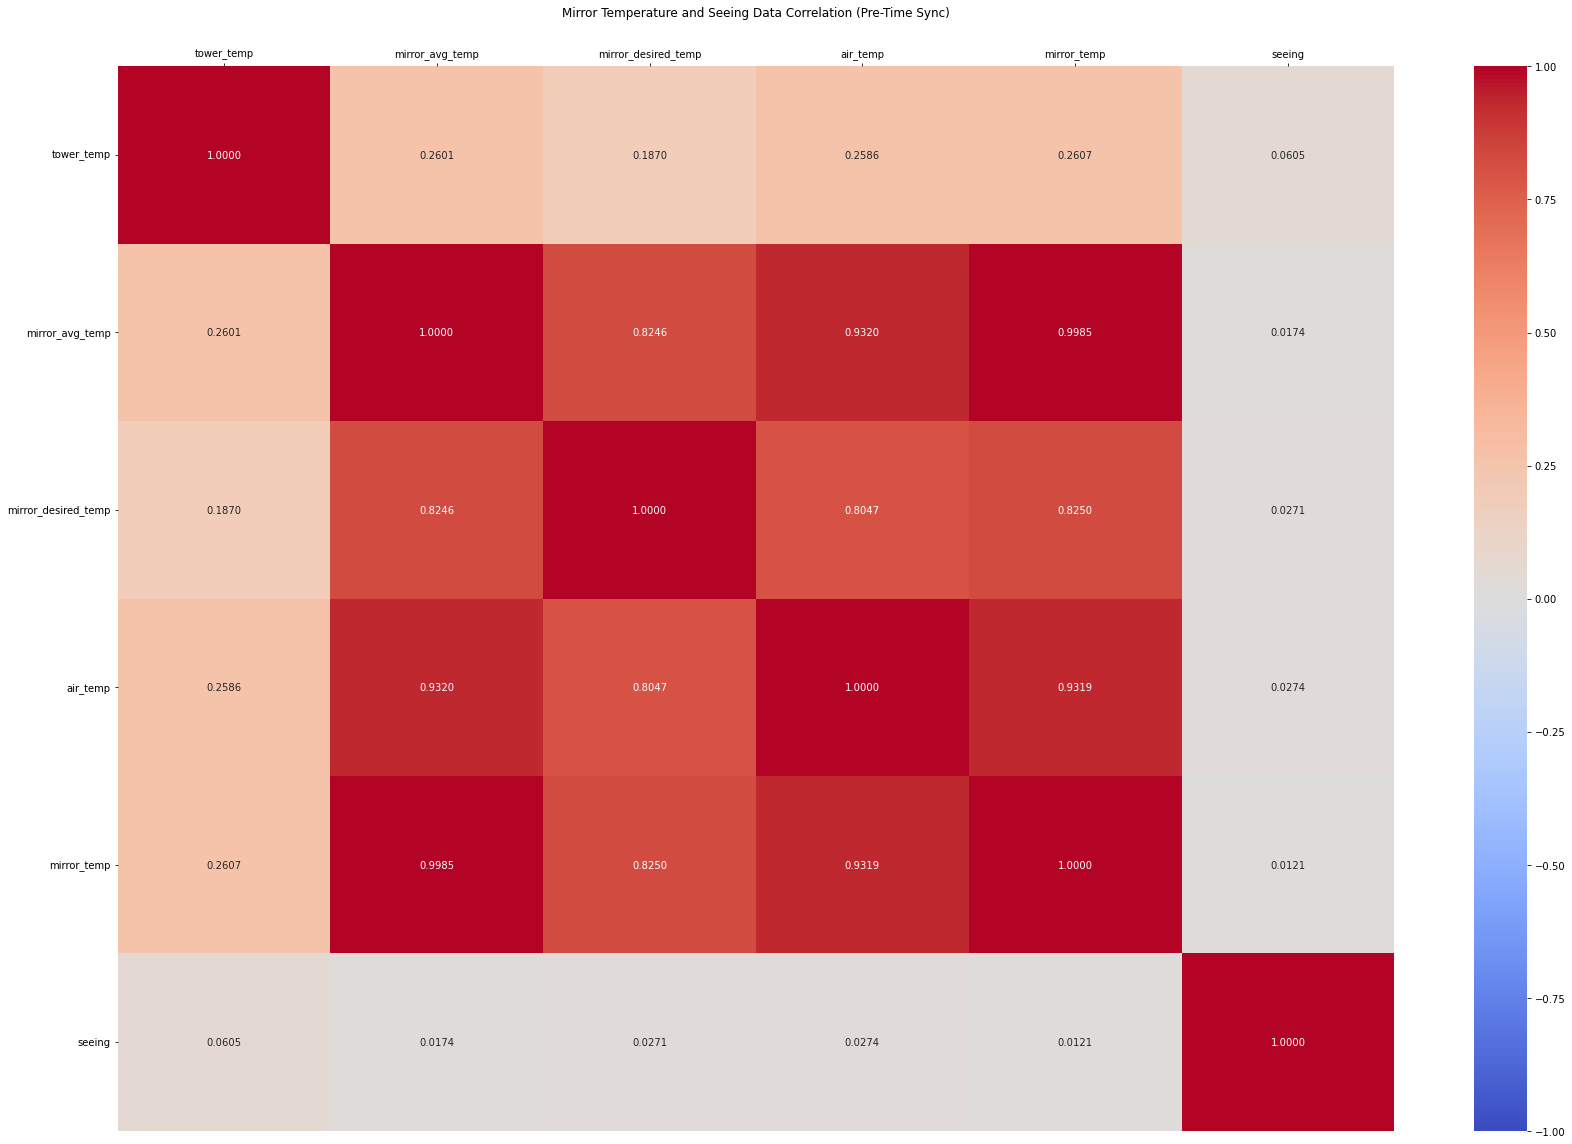

In [17]:
fig, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(mirror_and_seeing.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(mirror_and_seeing_labels, rotation=0)
ax.set_xticklabels(mirror_and_seeing_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Mirror Temperature and Seeing Data Correlation (Before Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('mirror_and_seeing_corr_before_sync.png')
plt.show()

## Temperature Correlation Matricies After Time Synchronization

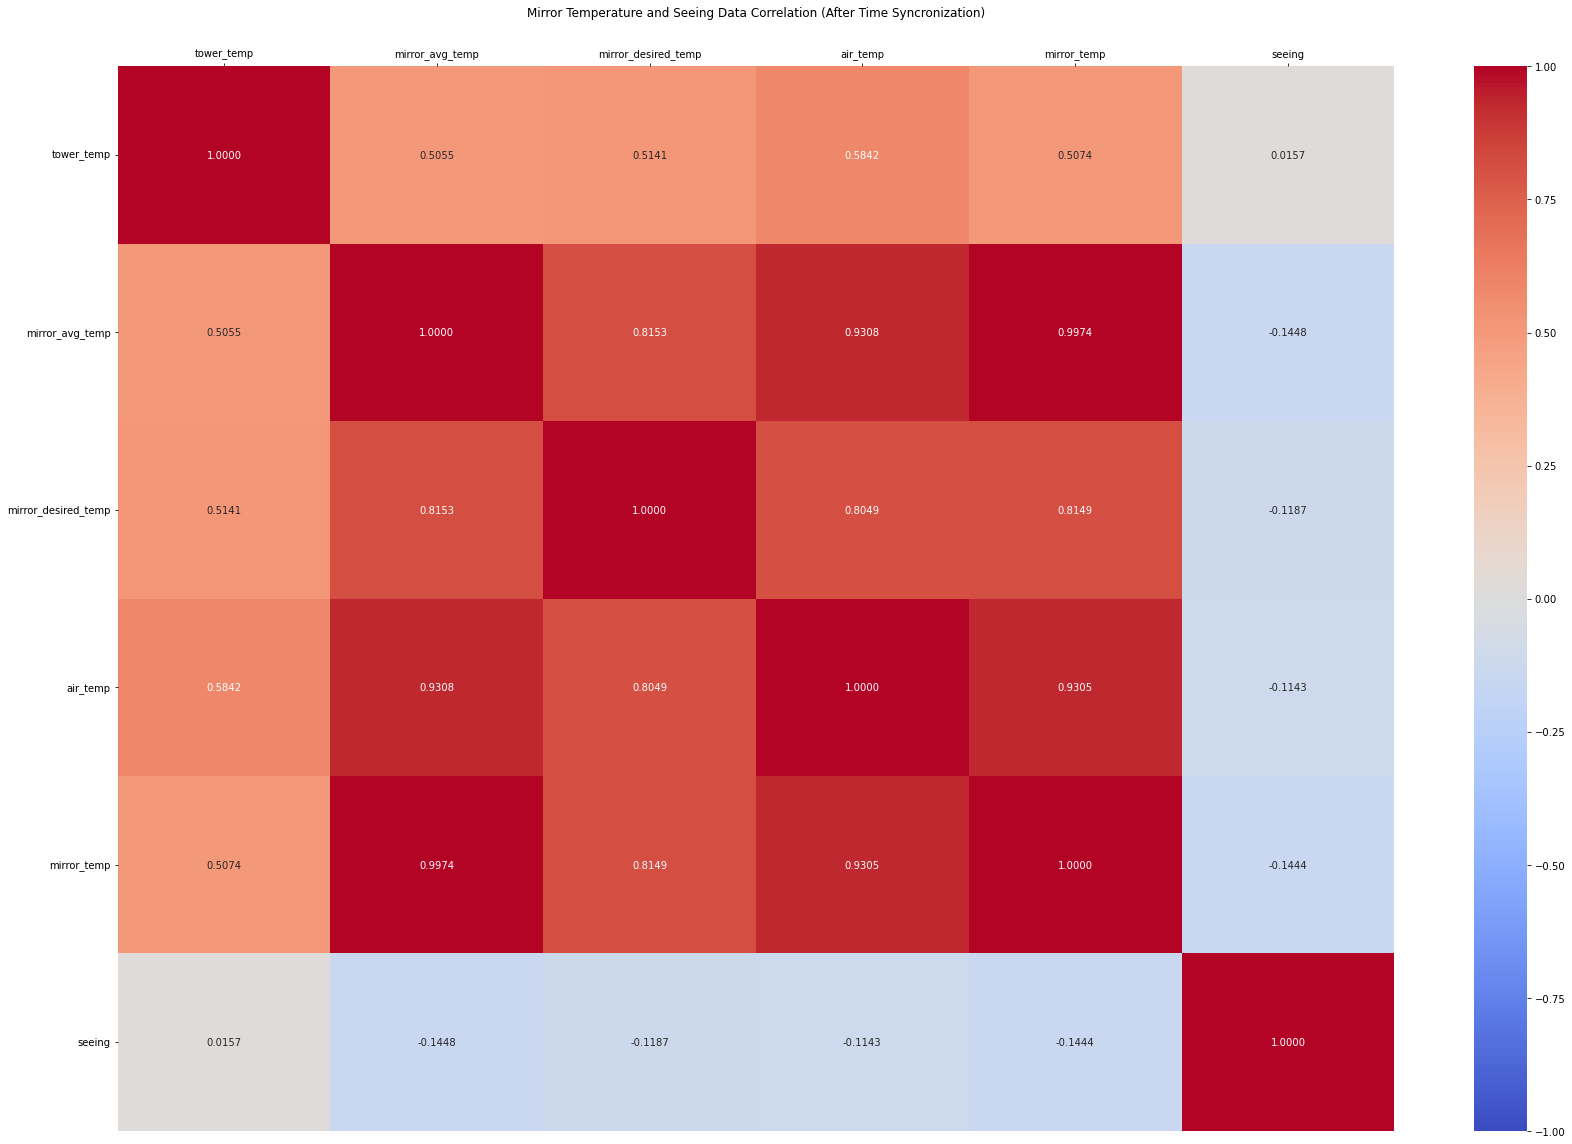

In [22]:
with open('../data/resampled_tower_data.pkl', 'rb') as pf:
    tower_data = pickle.load(pf).to_pandas()
with open('../data/resampled_dome_data.pkl', 'rb') as pf:
    dome_data = pickle.load(pf).to_pandas()
with open('../data/resampled_telescope_data.pkl', 'rb') as pf:
    telescope_data = pickle.load(pf).to_pandas()
with open('../data/resampled_seeing_data.pkl', 'rb') as pf:
    seeing_data = pickle.load(pf).to_pandas()
with open('../data/resampled_telemetry_data.pkl', 'rb') as pf:
    telemetry_data = pickle.load(pf).to_pandas()
with open('../data/resampled_tcs_data.pkl', 'rb') as pf:
    tcs_data = pickle.load(pf).to_pandas()

temp_data = pd.DataFrame()
temp_data['tower_temp'] = tower_data['temperature']
for i in dome_data.columns.values:
    temp_data[i] = dome_data[i]
temp_data['mirror_temp'] = telescope_data['mirror_temp']
temp_data['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
temp_data['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
temp_data['air_temp'] = telescope_data['air_temp']
    
fig, ax = plt.subplots(figsize=(25, 16))
sns.heatmap(temperature_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(temp_data.columns.values, rotation=0)
ax.set_xticklabels(temp_data.colums.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Temperature Data Correlation (After Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('temp_corr_after_sync.png')
plt.show()    

mirror_and_seeing = pd.DataFrame()
mirror_and_seeing['tower_temp'] = tower_data['temperature']
mirror_and_seeing['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
mirror_and_seeing['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
mirror_and_seeing['air_temp'] = telescope_data['air_temp']
mirror_and_seeing['mirror_temp'] = telescope_data['mirror_temp']
mirror_and_seeing['seeing'] = telemetry_data['seeing']

fig, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(mirror_and_seeing.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(mirror_and_seeing.columns.values, rotation=0)
ax.set_xticklabels(mirror_and_seeing.columns.values, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Mirror Temperature and Seeing Data Correlation (After Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('mirror_and_seeing_corr_after_sync.png')
plt.show()